# Solve the Saha equation numerically

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as const
from scipy import optimize, special

Let's find the solution for the equation
$$
\frac{1-X}{X^2} = \frac{g_{He}}{g_e \, g_{He^{+}}} \, \zeta (3) \, \eta \, \sqrt(\frac{2}{\pi}) \, \left( \frac{m_e c^2}{kT} \right) ^{-3/2} \exp \left[ \frac{Q_{He}}{kT} \right]
$$
for $X = 1/2$

In [3]:
g_prefactor = 1/4
Q_He = 24.6 * u.eV
eta = 6e-10
X=1/2


def saha(T):
    numerical_prefactor = g_prefactor * eta * special.zeta(3) * np.sqrt(2 / np.pi)
    factor1 = ((const.m_e * const.c**2) / (const.k_B * T)) ** (-3/2)
    factor2 = np.exp(Q_He /(const.k_B * T))
    val = numerical_prefactor * factor1 * factor2
    return val


def sahaX(X):
    return (1 - X)/X**2


def root_f(T_dimless):
    return saha(T_dimless * u.K) - sahaX(X)

In [4]:
res = optimize.root(root_f, x0=1000)
res

    fjac: array([[-1.]])
     fun: array([1.40021328e-12])
 message: 'The solution converged.'
    nfev: 355
     qtf: array([-7.89092724e-08])
       r: array([0.01306604])
  status: 1
 success: True
       x: array([6496.59616294])

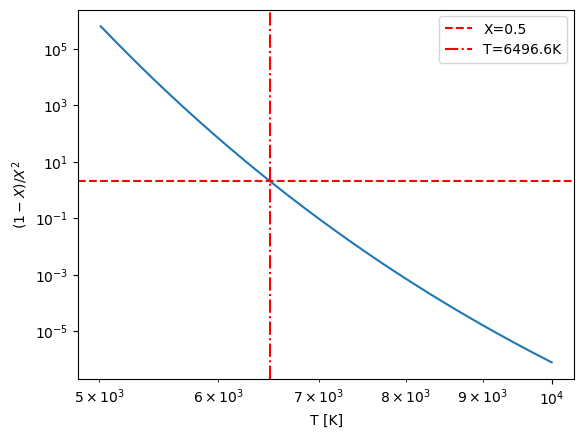

In [5]:
test_T = np.logspace(3.7, 4, 1000)
test_saha = saha(test_T * u.K)

fig, ax = plt.subplots()
ax.plot(test_T, test_saha)
ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(sahaX(X), ls='--', c='r', label=f'X={X:.1f}')
ax.axvline(res.x[0], ls='-.', c='r', label=f'T={res.x[0]:.1f}K')
ax.legend()
ax.set_xlabel('T [K]')
ax.set_ylabel('$(1-X)/X^2$')

plt.show()
plt.close()